In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

In [2]:
#pip install split-folders

# Splitting the dataset into train validation and test sets using splitfolders

In [3]:
import splitfolders

#splitfolders.ratio("./tomatoplants/", output="dataset", seed=234, ratio=(.75, .1, .15))

In [4]:
imageSize= 256
channels= 3
batchSize= 32

# Augmenting and reading the dataset 

In [5]:
train_datagenerator= ImageDataGenerator(rescale= 1.0/255,
                                        horizontal_flip=True,
                                        rotation_range=10)

train_dataset= train_datagenerator.flow_from_directory('dataset/train',
                                                       target_size= (imageSize, imageSize),
                                                       batch_size= batchSize,
                                                       class_mode= "sparse"
                                                      )

Found 12006 images belonging to 10 classes.


In [6]:
train_dataset.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [7]:
list(train_dataset.class_indices.keys())

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [8]:
classNames= list(train_dataset.class_indices.keys())

In [9]:
validation_datagenerator= ImageDataGenerator(rescale=1.0/255,
                                            horizontal_flip= True,
                                            rotation_range= 10
                                           )

validation_dataset= validation_datagenerator.flow_from_directory('dataset/val',
                                                                 target_size= (imageSize, imageSize),
                                                                 batch_size= batchSize,
                                                                 class_mode= "sparse")

Found 1596 images belonging to 10 classes.


In [10]:
test_datagenerator= ImageDataGenerator(rescale=1.0/255,
                                            horizontal_flip= True,
                                            rotation_range= 10
                                           )

test_dataset= validation_datagenerator.flow_from_directory('dataset/val',
                                                                 target_size= (imageSize, imageSize),
                                                                 batch_size= batchSize,
                                                                 class_mode= "sparse")

Found 1596 images belonging to 10 classes.


In [11]:
for image_batch, label_batch in train_dataset:
    print(image_batch[0].shape)
    print(image_batch.shape)
    print(label_batch)
    break

(256, 256, 3)
(32, 256, 256, 3)
[8. 4. 9. 1. 0. 1. 6. 3. 4. 3. 7. 2. 6. 9. 1. 0. 4. 9. 7. 9. 7. 6. 7. 7.
 3. 4. 3. 7. 7. 4. 9. 7.]


# Building the model

In [12]:
inputShape= (imageSize, imageSize, channels)
n_class= 10

model= models.Sequential([
    layers.InputLayer(input_shape=inputShape),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_class, activation='softmax')
])

model.build(input_shape=inputShape)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [14]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics= ["accuracy"]
             )

In [15]:
12006/32

375.1875

In [16]:
1596/32 

49.875

In [17]:
history= model.fit(
    train_dataset, 
    steps_per_epoch= 375,
    batch_size= 32,
    validation_data=validation_dataset,
    validation_steps=49,
    verbose=1,
    epochs=30
)

Epoch 1/30


375/375 [==============================] - 375s 989ms/step - loss: 1.5859 - accuracy: 0.4433 - val_loss: 1.0521 - val_accuracy: 0.6269
Epoch 2/30
375/375 [==============================] - 362s 966ms/step - loss: 0.8915 - accuracy: 0.6931 - val_loss: 0.7113 - val_accuracy: 0.7577
Epoch 3/30
375/375 [==============================] - 393s 1s/step - loss: 0.6196 - accuracy: 0.7893 - val_loss: 0.7060 - val_accuracy: 0.7526
Epoch 4/30
375/375 [==============================] - 411s 1s/step - loss: 0.4609 - accuracy: 0.8402 - val_loss: 0.4417 - val_accuracy: 0.8457
Epoch 5/30
375/375 [==============================] - 417s 1s/step - loss: 0.3816 - accuracy: 0.8690 - val_loss: 0.3243 - val_accuracy: 0.8909
Epoch 6/30
375/375 [==============================] - 420s 1s/step - loss: 0.3277 - accuracy: 0.8859 - val_loss: 0.3967 - val_accuracy: 0.8616
Epoch 7/30
375/375 [==============================] - 410s 1s/step - loss: 0.2753 - accuracy: 0.9040 - val_loss: 0.2537 - val_accuracy

# Model Evaluation

In [18]:
scores= model.evaluate(test_dataset)
scores

50/50 [==============================] - 20s 393ms/step - loss: 0.0957 - accuracy: 0.9662


[0.09570994973182678, 0.9661654233932495]

# Prediction and visualization

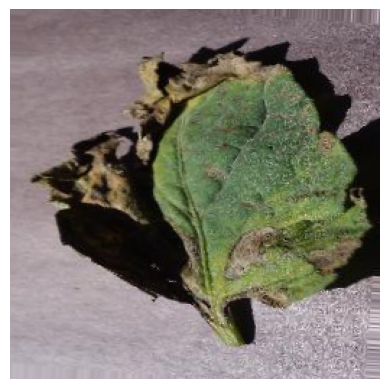

1/1 [==============================] - 0s 172ms/step
Actual image: Tomato_Early_blight
Predicted image: Tomato_Early_blight
Confidence level: 99.98 %


In [21]:
for image_batch, label_batch in test_dataset:
    image= image_batch[0]
    label= int(label_batch[0])
    
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    
    batch_prediction= model.predict(image_batch)
       
    print("Actual image:", classNames[label])
    print("Predicted image:", classNames[np.argmax(batch_prediction[0])])
    print("Confidence level:", round(100*(np.max(batch_prediction[0])),2), "%")
    
    break

In [24]:
def predict_image(model, img):
    image_arr= tf.keras.preprocessing.image.img_to_array(images[i])
    image_arr= tf.expand_dims(image_arr, 0)
    
    predictions= model.predict(image_arr)
    pred_class= classNames[np.argmax(predictions[0])]
    confidence= round(100*(np.max(predictions[0])), 2)
    
    return pred_class, confidence

1/1 [==============================] - 0s 12ms/step


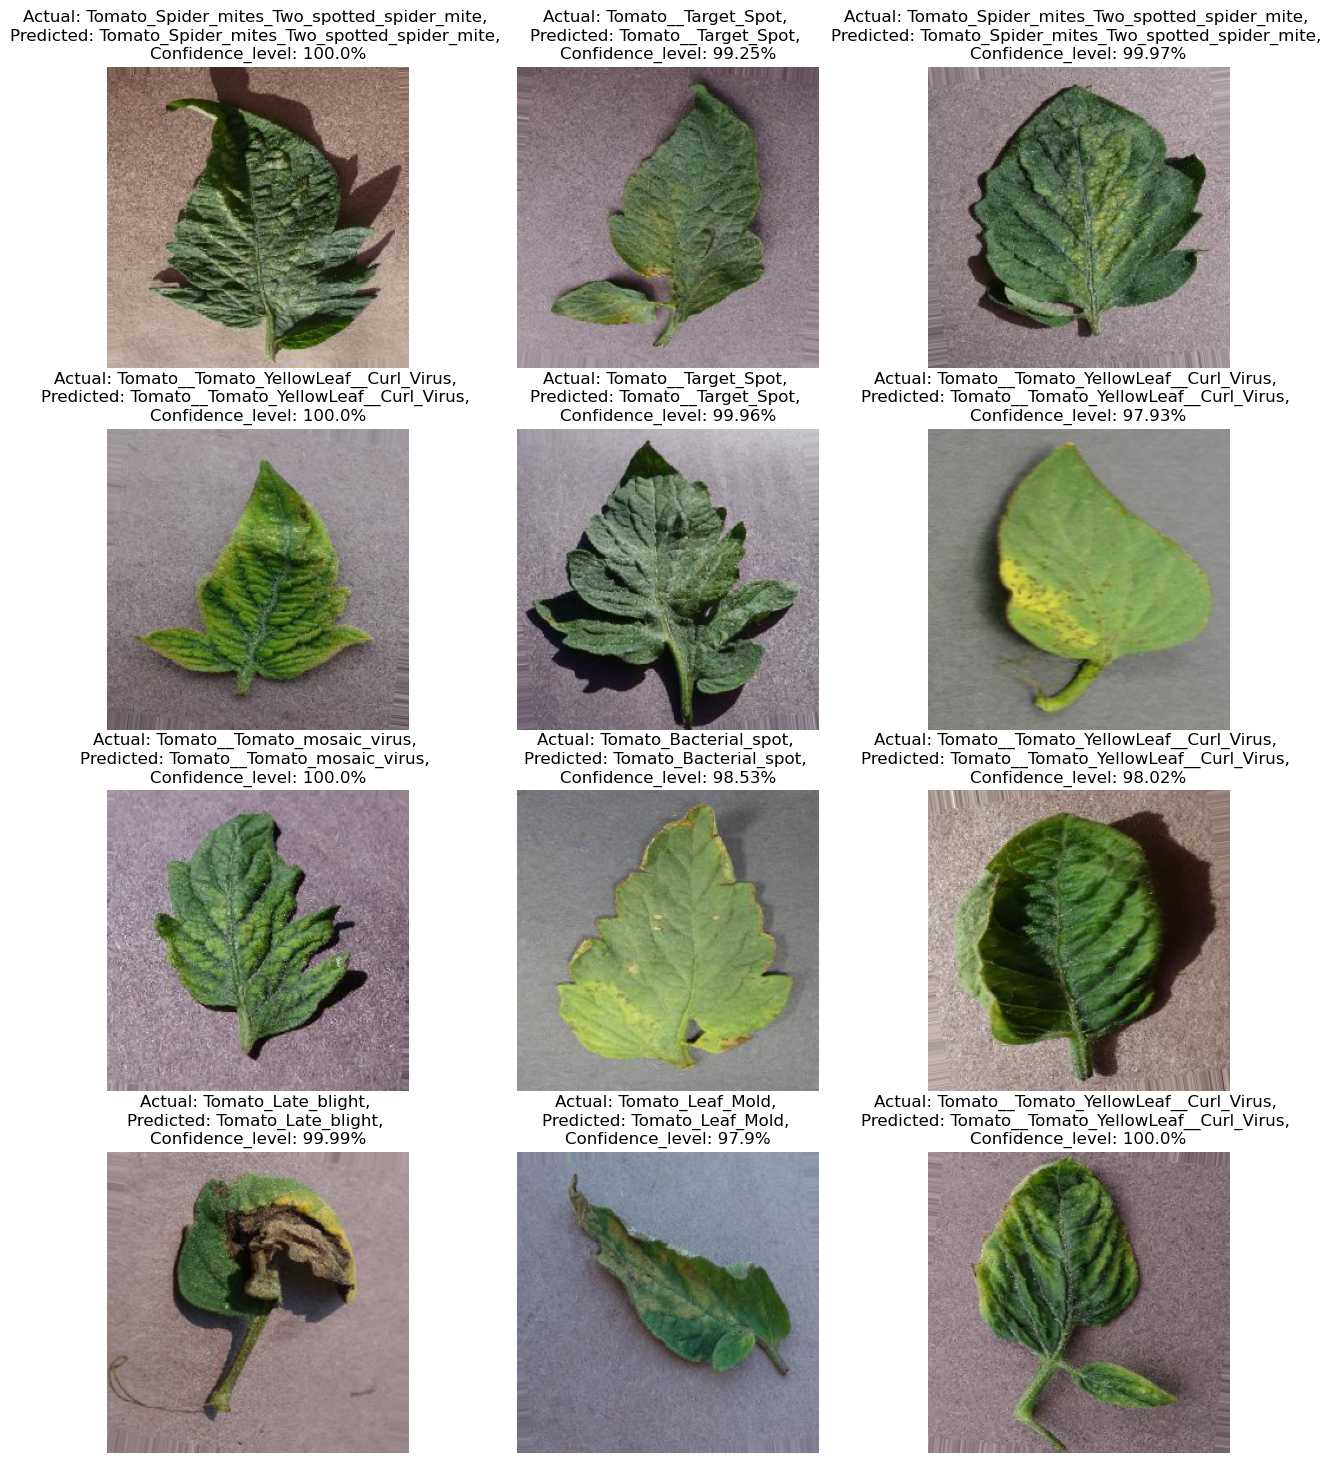

In [35]:
plt.figure(figsize=(15, 18))

for images, labels in test_dataset:
    for i in range(12):
        plt.subplot(4, 3, i+1)
        plt.imshow(images[i])
        plt.axis("off")
        
        predicted_class, confidence_level= predict_image(model, images[i])
        actual_class= classNames[int(labels[i])]
        
        plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class}, \nConfidence_level: {confidence_level}%")
        
    break